**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**LOADING THE DATASET**

In [2]:
data = pd.read_csv('/content/salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


The dataset consists of 13972 rows and includes the following columns:

**experience_level:** The level of experience required for the job.

**salary:** The salary information in the original currency.

**salary_in_usd:** The salary converted to US dollars.

**employment_type:** The type of employment (e.g., full-time, part-time, contract).

**job_title:** The original job title.

**salary_currency:** The currency in which the salary is provided.

**employee_residence:** The abbreviation of the employee's country of residence.

**company_location:** The location of the company.

**company_size:** The size of the company.

Job Title Clustering

In [3]:
data.shape

(13972, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
data['employment_type'].value_counts()

FT    13912
CT       26
PT       22
FL       12
Name: employment_type, dtype: int64

In [7]:
data['num_workers']=data['job_title'].value_counts()

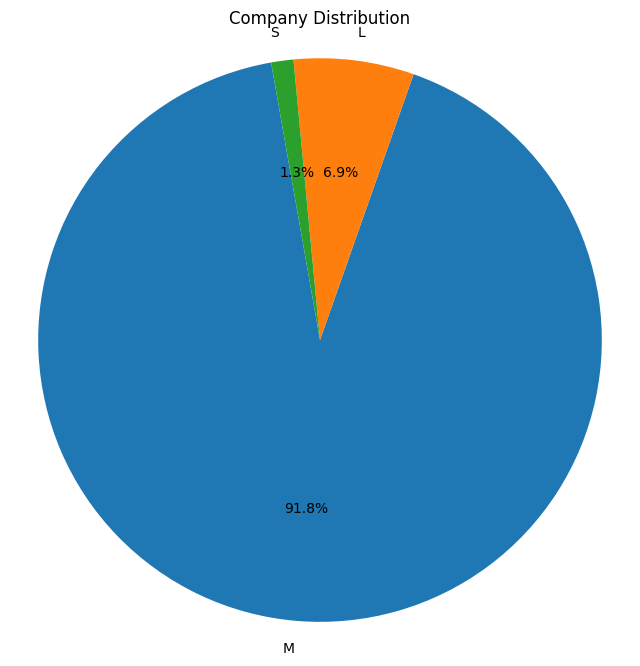

In [7]:
company_size = data['company_size'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(company_size, labels=company_size.index, autopct='%1.1f%%', startangle=100)
plt.title('Company Distribution')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Frequency')

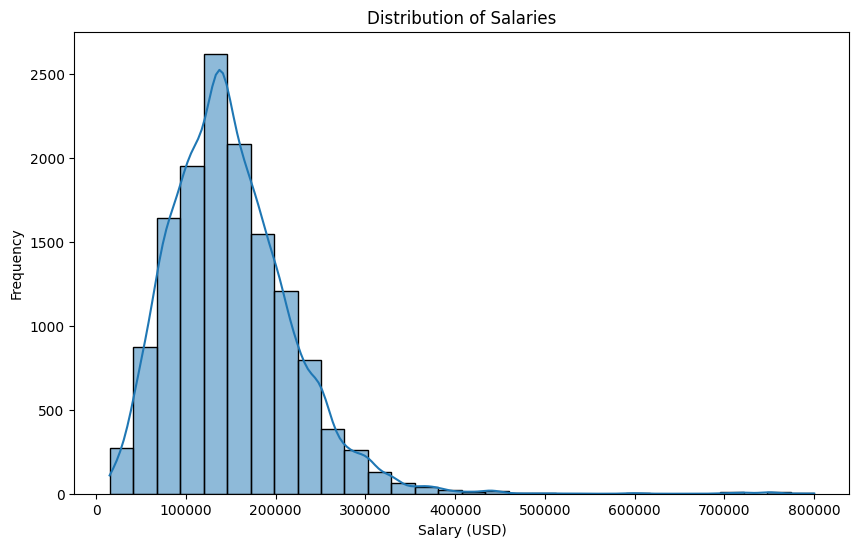

In [77]:
plt.figure(figsize=(10,6))
sns.histplot(x='salary_in_usd',data=data,bins=30,kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

In [35]:
data['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
data['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
data['remote_ratio'].replace({0:'Full Time',100:'Remote Work',50:'Hybrid'},inplace=True)

In [36]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,num_workers
0,2024,Senior,Full-Time,AI Engineer,90000,USD,90000,AE,Full Time,AE,L,NaN
1,2024,Senior,Full-Time,Machine Learning Engineer,180500,USD,180500,US,Full Time,US,M,NaN
2,2024,Senior,Full-Time,Machine Learning Engineer,96200,USD,96200,US,Full Time,US,M,NaN
3,2024,Senior,Full-Time,Machine Learning Engineer,235000,USD,235000,AU,Full Time,AU,M,NaN
4,2024,Senior,Full-Time,Machine Learning Engineer,175000,USD,175000,AU,Full Time,AU,M,NaN


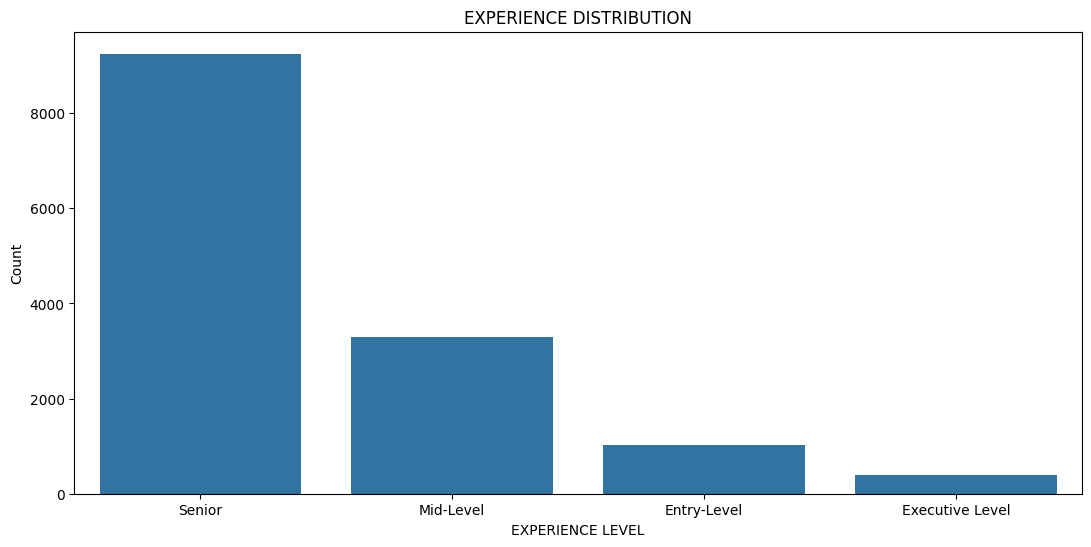

In [18]:
plt.figure(figsize = (13,6))
sns.countplot(data,x = 'experience_level')
plt.xlabel("EXPERIENCE LEVEL")
plt.ylabel("Count")
plt.title("EXPERIENCE DISTRIBUTION")
plt.show()

Based on the experience level analysis, it is evident that nearly half of the professionals are categorized as senior level. A slightly higher number, just above 200 individuals, are classified as middle level. Less than one-sixth of the professionals are considered to be at the entry level, indicating a relatively smaller portion. Lastly, there is a very small minority of professionals at the executive level.

[]

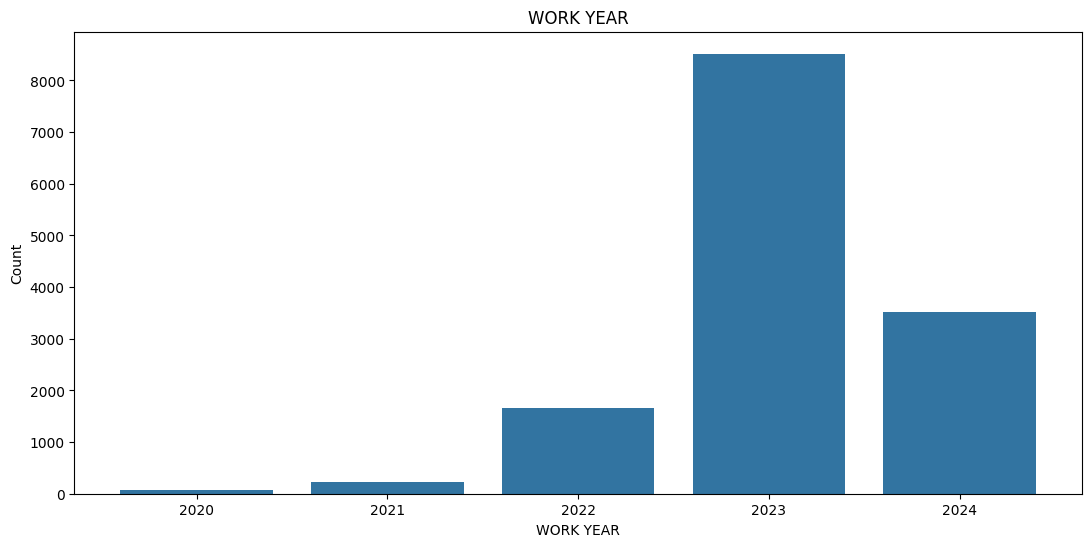

In [17]:
plt.figure(figsize = (13,6))
sns.countplot(data = data,x = 'work_year')
plt.xlabel("WORK YEAR")
plt.ylabel("Count")
plt.title("WORK YEAR")
plt.plot()

In [4]:
JOB_TITLE = data['job_title'].value_counts().head()

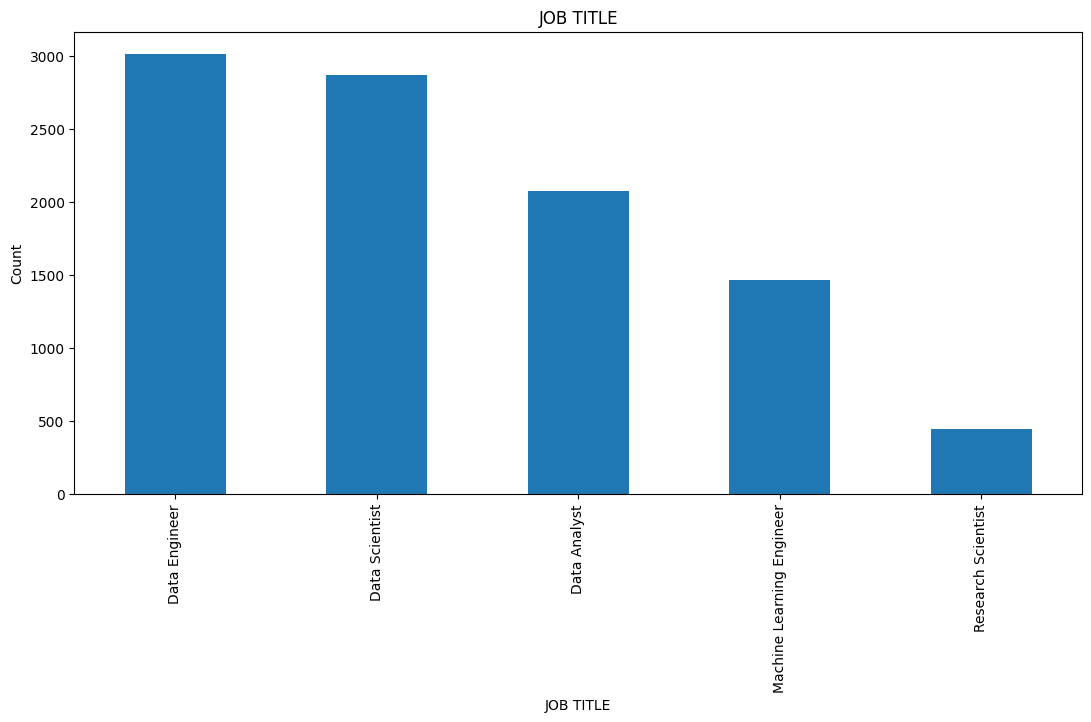

In [48]:
plt.figure(figsize = (13,6))
data['job_title'].value_counts().head().plot(kind='bar')
plt.xlabel("JOB TITLE")
plt.ylabel("Count")
plt.title("JOB TITLE")
plt.show()

**BASED ON THE ABOVE INFORMATION IT IS EVIDENT THAT THE TOP THREE JOB TITLES ARE AS FOLLOWS:**

DATA ENGINEER

DATA SCIRNTIST

DATA ANALYST

**THE TOP 2 LEAST POPULATED JOB TITLES ARE:**

MACHINE LEARNING ENGINEER

RESRARCH SCIENTIST

In [18]:
num_cols=['work_year','salary',
            'salary_in_usd','remote_ratio']

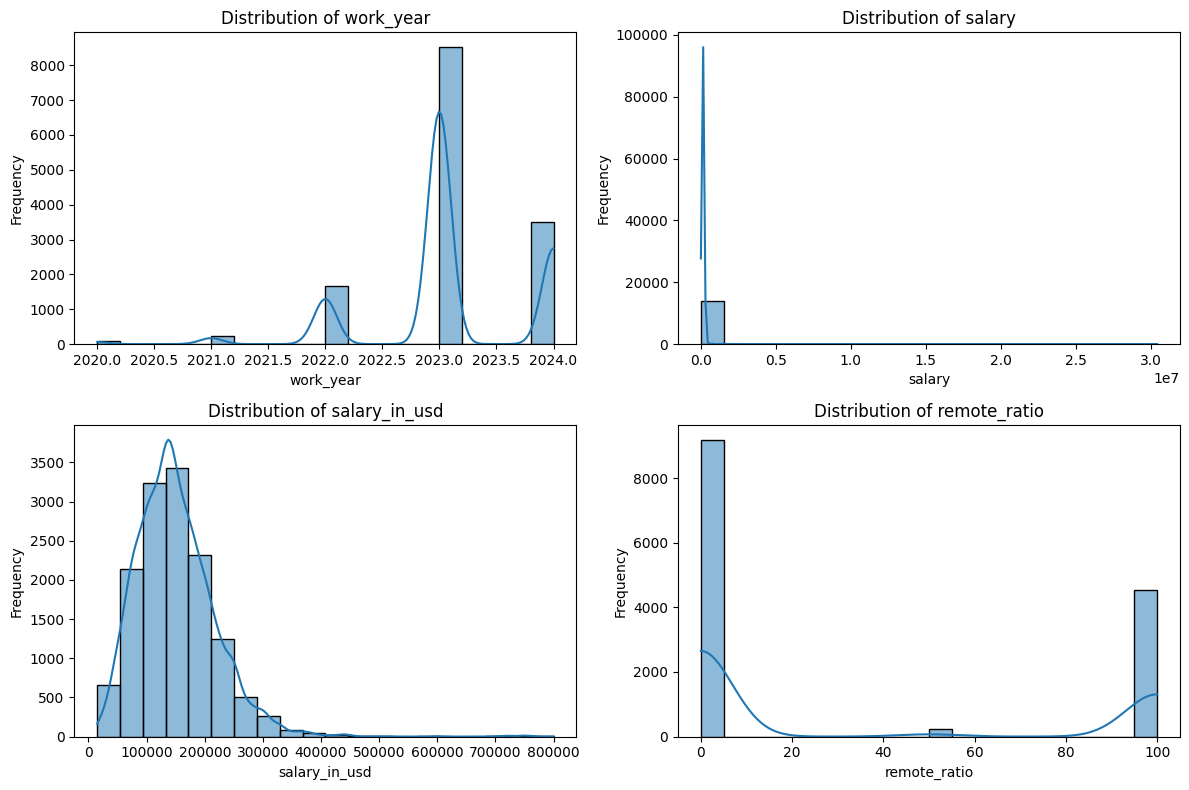

In [11]:
plt.figure(figsize=(12, 8))
for feature in num_cols:
    plt.subplot(2, len(num_cols)//2, num_cols.index(feature)+1)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

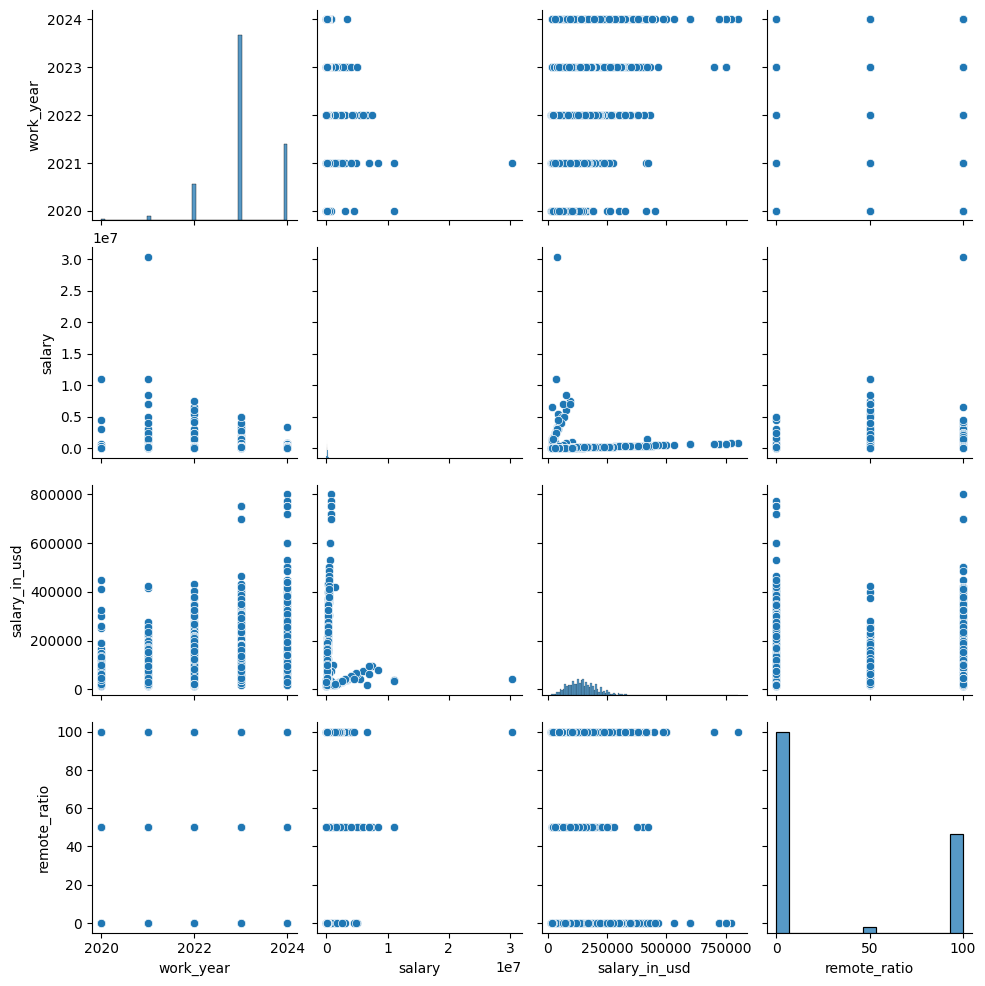

In [76]:
sns.pairplot(data)

<BarContainer object of 4 artists>

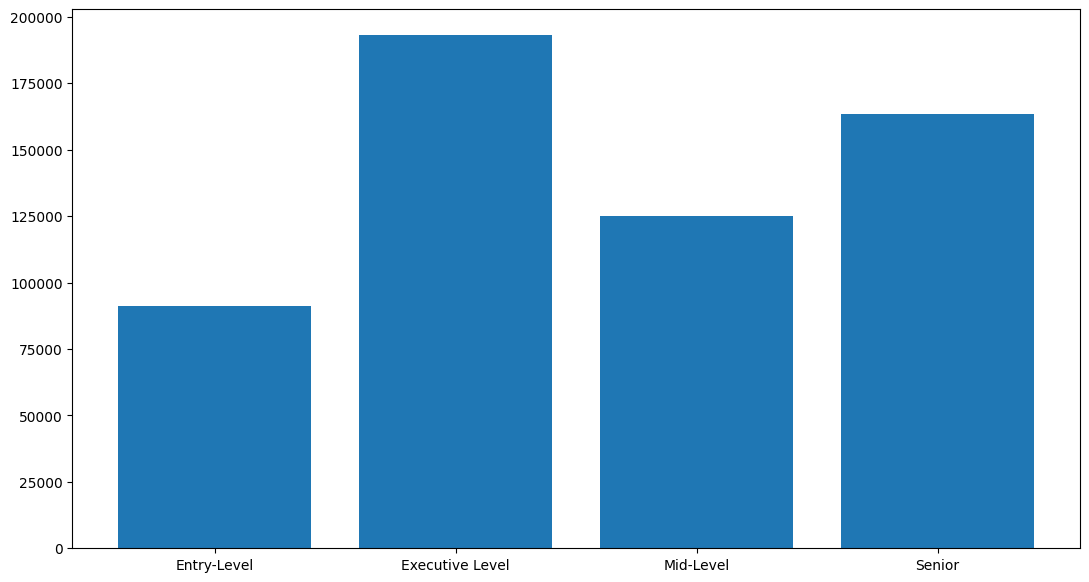

In [51]:
plt.figure(figsize=(13,7))
Salary=data.groupby("experience_level")["salary_in_usd"].mean()
plt.bar(Salary.index,Salary.values)

Based on the experience level analysis, it is evident that nearly half of the professionals are categorized as senior level. A slightly higher number, just above 200 individuals, are classified as middle level. Less than one-sixth of the professionals are considered to be at the entry level, indicating a relatively smaller portion. Lastly, there is a very small minority of professionals at the executive level.



<ipython-input-48-578bcff5eac4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='experience_level',data = data,kind = 'count',palette = 'magma')


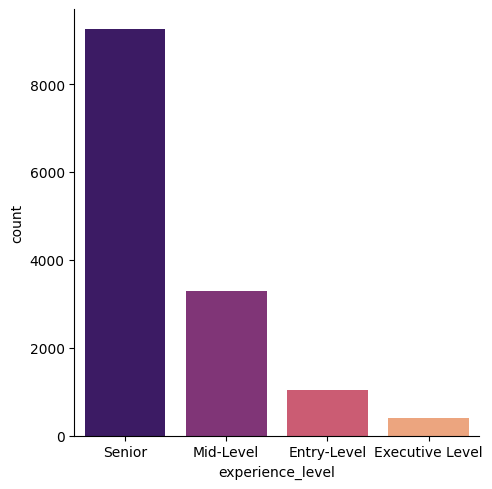

In [48]:
sns.catplot(x='experience_level',data = data,kind = 'count',palette = 'magma')
plt.show()

<Figure size 1500x800 with 0 Axes>

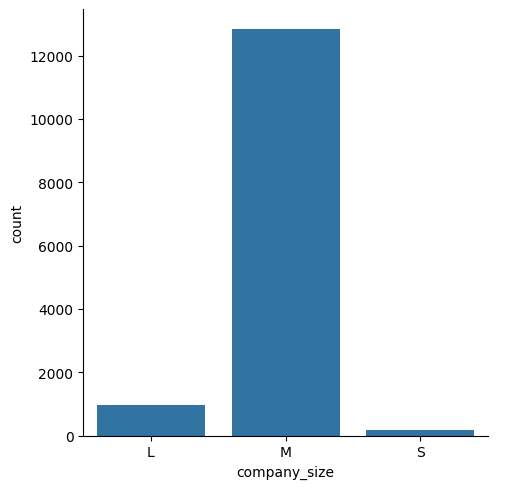

In [45]:
sns.catplot(x='company_size',data = data,kind = 'count')
plt.show()

A significant majority, comprising more than half of the employees, are currently employed in medium-sized companies. Approximately one-third of the workforce is engaged in large-cap companies. In contrast, a minority, numbering fewer than 100 individuals, work in small companies.

A significant majority, comprising more than half of the employees, are currently employed in medium-sized companies. Approximately one-third of the workforce is engaged in large-cap companies. In contrast, a minority, numbering fewer than 100 individuals, work in small companies.

<Axes: xlabel='employment_type'>

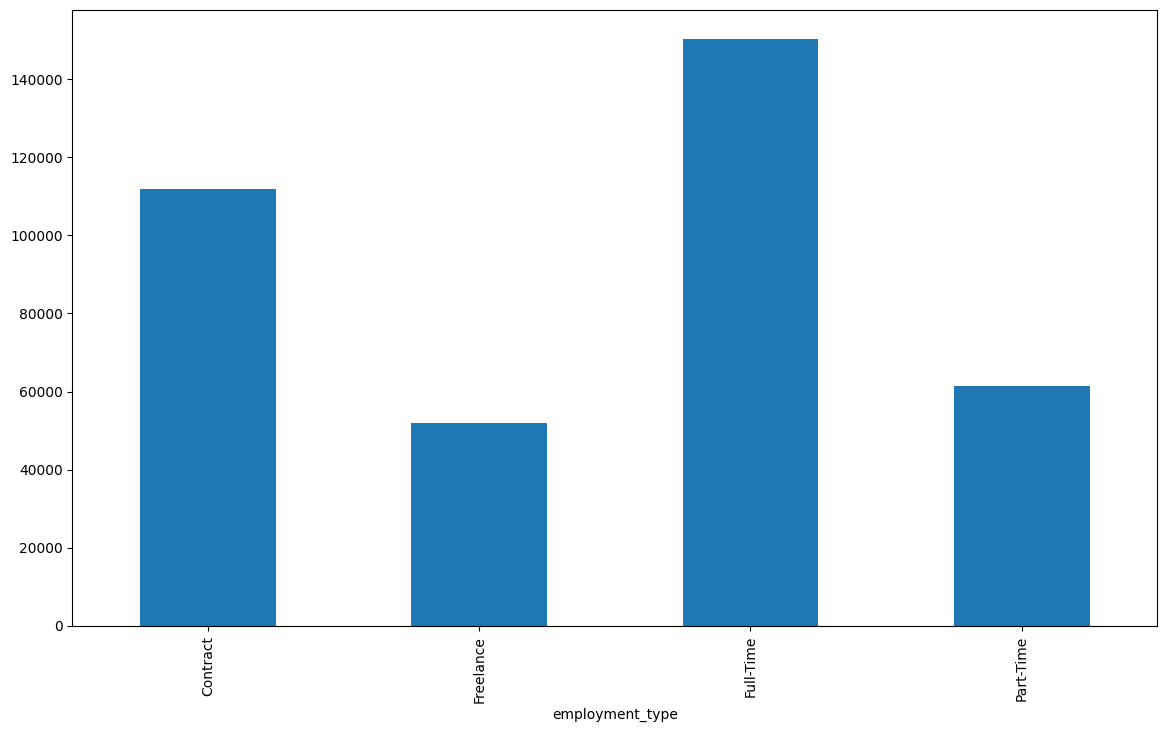

In [31]:
data.groupby("employment_type")["salary_in_usd"].mean().plot(kind='bar',figsize=(14,8))

THE FULL TIME WORKERS HAVE THE HIGHEST SALARY FOLLOWED BY
CONTRACT TYPE AND PART TIME.

THE LOWEST SALARY CORROSPONDS TO FREELANCE JOBS

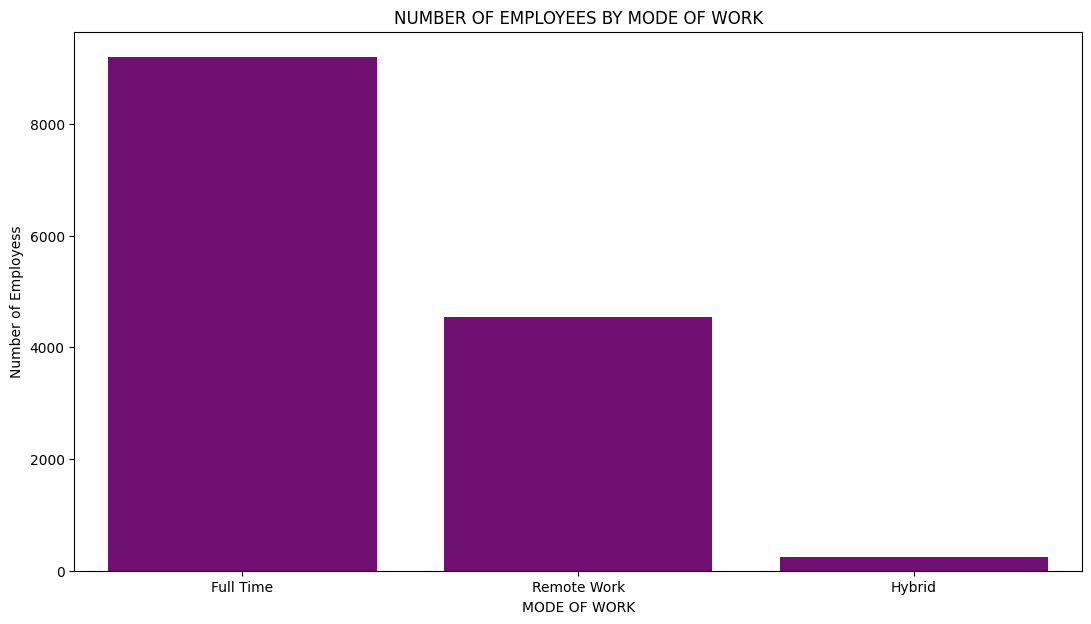

In [41]:
remote_ratio_counts = data['remote_ratio'].value_counts()

plt.figure(figsize=(13, 7))
order = remote_ratio_counts.index
ax = sns.barplot(x=order, y=remote_ratio_counts.values, color='purple', order=order)
plt.xlabel('MODE OF WORK')
plt.ylabel('Number of Employess')
plt.title('NUMBER OF EMPLOYEES BY MODE OF WORK')
plt.show()

The data presented in the above plot highlights a remarkable majority of employees who work on a full-time, in-person basis at their company headquarters. Following closely as the second most common arrangement for data professionals is remote working, with a relatively narrow gap in comparison. The least prevalent choice of working arrangement is hybrid work, where employees have a combination of remote and in-person work.

In [ ]:
locations = data.company_location.value_counts()
locations.head(10)

<ipython-input-25-a6e3e5d383e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locations.values[:10],y=locations.index[:10],palette = 'magma')


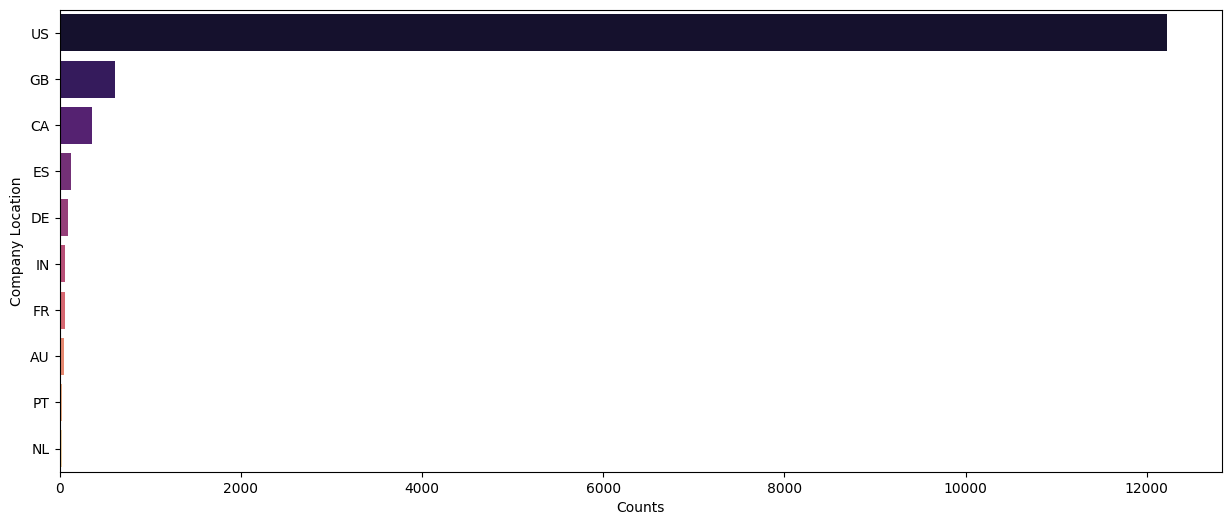

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x=locations.values[:10],y=locations.index[:10],palette = 'magma')
plt.ylabel('Company Location')
plt.xlabel('Counts')
plt.show()

In [71]:
job_mean_salary_2024 = data.loc[data['work_year']==2024].groupby(['job_title']).agg(mean_salary_in_usd=('salary_in_usd', 'mean'))

top_job_title_2024 = job_mean_salary_2024.sort_values(by='mean_salary_in_usd', ascending=False).head(10)


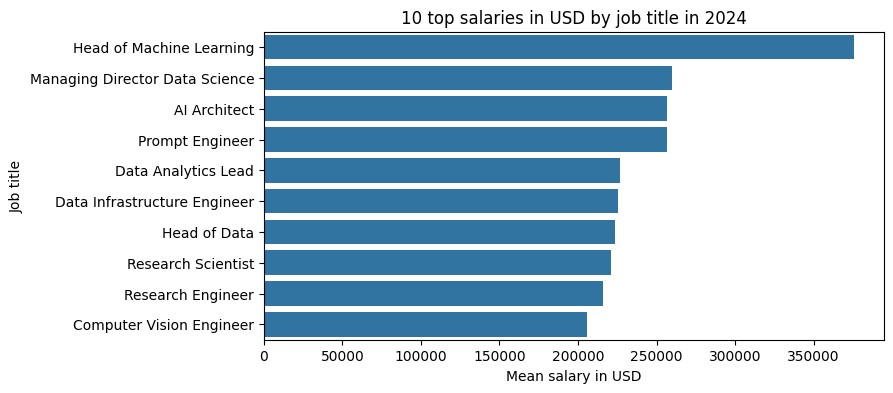

In [73]:
plt.figure(figsize=(8,4))
sns.barplot(data=top_job_title_2024,
            y=top_job_title_2024.index,
            x='mean_salary_in_usd',
            orient='h')
plt.title('10 top salaries in USD by job title in 2024')
plt.ylabel('Job title')
plt.xlabel('Mean salary in USD')
plt.show()

In [53]:
mean_remote_ratio=data['remote_ratio'].mean()

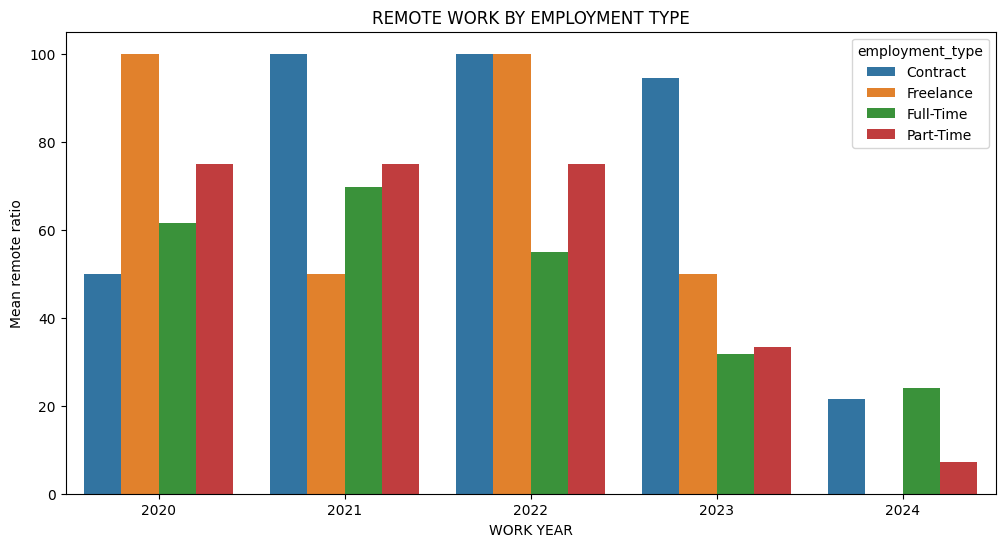

In [62]:
remote_ratio_mean = data.groupby(['work_year', 'employment_type']).agg(mean_remote_ratio=('remote_ratio', 'mean'))
remote_ratio_mean.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=remote_ratio_mean,  x='work_year', y='mean_remote_ratio', hue='employment_type')
plt.title('REMOTE WORK BY EMPLOYMENT TYPE')
plt.xlabel('WORK YEAR')
plt.ylabel('Mean remote ratio')
plt.show()